<a href="https://colab.research.google.com/github/lasyareddy360/Flat-Price-Estimation-for-UrbanNest-Realtors/blob/main/outfit_recommendation_based_on_skin_stone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import random

# Load dataset
dataset_path = '/content/drive/MyDrive/Special Project/styles.csv'
data = pd.read_csv(dataset_path, on_bad_lines='skip')

# Display initial data overview
print("Dataset Overview:")
print(data.head())

Dataset Overview:
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [ ]:
columns_to_keep = ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']
data = data[columns_to_keep]

In [ ]:
# Clean missing values
data.dropna(subset=['gender', 'masterCategory', 'baseColour'], inplace=True)
data['baseColour'] = data['baseColour'].fillna('Unknown')

In [ ]:
# Standardize column names
data.columns = [col.strip().lower() for col in data.columns]

In [ ]:
# Check unique values for key features
print("\nUnique values in gender:", data['gender'].unique())
print("Unique values in season:", data['season'].unique())
print("Unique values in usage:", data['usage'].unique())


Unique values in gender: ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
Unique values in season: ['Fall' 'Summer' 'Winter' 'Spring' nan]
Unique values in usage: ['Casual' 'Ethnic' 'Formal' 'Sports' nan 'Smart Casual' 'Travel' 'Party'
 'Home']


In [ ]:
# Filter Column Values with only specific Values in gender
data = data[data['gender'].isin(["Men","Women"])]
data = data[data['mastercategory'].isin(['Apparel','Footwear'])]
data = data[~data['subcategory'].isin(['Innerwear','Loungewear and Nightwear'])]
data = data[~data['usage'].isin([None,'Home'])]
print(data['subcategory'].unique())

['Topwear' 'Bottomwear' 'Shoes' 'Flip Flops' 'Sandal' 'Saree' 'Dress'
 'Apparel Set']


In [ ]:
data.head(5)

,id,gender,mastercategory,subcategory,articletype,basecolour,season,usage
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual


In [ ]:
!pip install stone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 6.7 MB/s eta 0:00:00


In [ ]:
from PIL import Image
from PIL import ImageColor
import cv2
import numpy as np
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import stone
from IPython.display import HTML

# Skin tone mapping based on hex colors
skin_tones = {
    "#373028": "Deepest Skin",
    "#422811": "Very Deep",
    "#513B2E": "Deep Brown",
    "#6F503C": "Medium Brown",
    "#81654F": "Tan",
    "#9D7A54": "Light Tan",
    "#BEA07E": "Medium Fair",
    "#E5C8A6": "Light Fair",
    "#E7C1B8": "Warm Fair",
    "#F3DAD6": "Very Fair",
    "#FBF2F3": "Pale",
}

In [ ]:
# Function to detect skin tone from an image
def detect_skin_tone(image):
    # Load image and resize for processing
    # image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (200, 200))
    # Get dominant color (simplified for skin tone detection)
    average_color = resized_image.mean(axis=0).mean(axis=0)
    avg_color_hex = "#{:02x}{:02x}{:02x}".format(int(average_color[0]), int(average_color[1]), int(average_color[2]))
    # Convert hex colors to RGB for comparison
    avg_color_rgb = np.array(ImageColor.getrgb(avg_color_hex))

    # Find the closest skin tone based on Euclidean distance
    closest_tone_hex = min(
        skin_tones.keys(),
        key=lambda hex_code: np.linalg.norm(avg_color_rgb - np.array(ImageColor.getrgb(hex_code)))
    )
    return closest_tone_hex, skin_tones[closest_tone_hex]

In [ ]:
# Function to display colored box
def display_box(face, width=200, height=100):
    display(HTML(f'<div style="width:{width}px; height:{height}px; background-color:{face[0]}; border: 2px solid black;">{face[1]}</div>'))

In [ ]:
detected_tone_hex = ""
class FaceCropper(object):

    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    def generate(self, image_path, show_result=True):
        img = cv2.imread(image_path)
        if img is None:
            print("Can't open image file")
            return 0

        # Convert to grayscale for better face detection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale image
        faces = self.face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
        if len(faces) == 0:
            print('Failed to detect faces')
            return 0

        if show_result:
            # Draw bounding boxes around the faces on the original image
            for (x, y, w, h) in faces:
                cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Convert the image from BGR to RGB for correct display with matplotlib
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Prepare for showing cropped face images
            cropped_faces = []

            # Crop faces and resize them to show as zoomed-in images
            for (x, y, w, h) in faces:
                face_img = img[y:y + h, x:x + w]
                resized_face = cv2.resize(face_img, (200, 200))  # Resize to zoom in
                cropped_faces.append((resized_face, (x, y, w, h)))  # Save cropped face and original position

            # Create a figure with 1 row and 3 columns for side-by-side display
            fig, ax = plt.subplots(1, 3, figsize=(16, 6))

            # Show the original image with bounding boxes in the first column
            ax[0].imshow(img_rgb)
            ax[0].axis('off')  # Hide axes
            ax[0].set_title('Original Image with Face Detection')

            # Show the first cropped face in the second column (zoomed-in)
            if cropped_faces:
                zoomed_face, (x, y, w, h) = cropped_faces[0]
                zoomed_face_rgb = cv2.cvtColor(zoomed_face, cv2.COLOR_BGR2RGB)
                global detected_tone_hex

                # Display the zoomed-in face in the second column
                ax[1].imshow(zoomed_face_rgb)
                ax[1].axis('off')  # Hide axes
                ax[1].set_title('Cropped Face (Zoomed-In)')

                # Optional: Draw the bounding box on the zoomed-in face
                rect_x = int((zoomed_face.shape[1] - w) / 2)  # Position the bounding box relative to zoom
                rect_y = int((zoomed_face.shape[0] - h) / 2)
                ax[1].add_patch(plt.Rectangle((rect_x, rect_y), w, h, linewidth=2, edgecolor='r', facecolor='none'))

                # Detect the skin tone of the cropped face
                skin_tone, skin_color = detect_skin_tone(img)
                detected_tone_hex = skin_tone
                orange_block = np.ones((10, 10, 3))
                orange_rgb = matplotlib.colors.hex2color(skin_tone)
                orange_block[:, :] = orange_rgb
                # Display the skin tone next to the zoomed-in face in the third column
                ax[2].imshow(orange_block)  # Display a block of color that represents the skin tone
                ax[2].axis('off')  # Hide axes
                ax[2].set_title(f"Skin Tone: {skin_tone} {skin_color}")

            plt.show()

        facecnt = len(faces)
        print(f"Detected faces: {facecnt}")

        # Save the cropped faces
        i = 0
        for (x, y, w, h) in faces:
            # Crop the face area
            faceimg = img[y:y + h, x:x + w]
            # Resize face to 32x32 (or any other size you prefer)
            lastimg = cv2.resize(faceimg, (32, 32))
            i += 1
            cv2.imwrite(f"image{i}.jpg", lastimg)

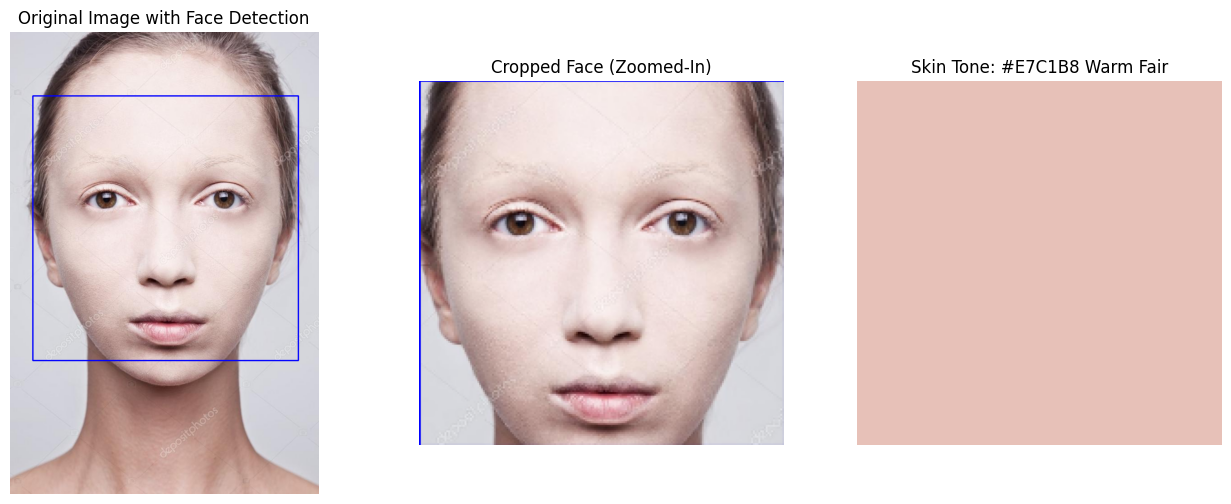

Detected faces: 1


In [ ]:
image_path = "/content/drive/MyDrive/women3.jpg"

# Create the FaceCropper instance and run the face detection
detector = FaceCropper()
detector.generate(image_path, show_result=True)

In [ ]:
# Skin tone to color mapping
skin_tone_to_color_mapping = {
    "#373028": ["Navy Blue", "Black", "Charcoal", "Burgundy", "Maroon", "Olive", "Rust", "Gold", "Cream", "Peach"],
    "#422811": ["Navy Blue", "Brown", "Khaki", "Olive", "Maroon", "Mustard", "Teal", "Tan", "Rust", "Burgundy"],
    "#513B2E": ["Cream", "Beige", "Olive", "Burgundy", "Red", "Orange", "Mustard", "Bronze", "Teal", "Peach"],
    "#6F503C": ["Beige", "Brown", "Green", "Khaki", "Cream", "Peach", "Lime Green", "Olive", "Maroon", "Rust", "Mustard"],
    "#81654F": ["Beige", "Off White", "Sea Green", "Cream", "Lavender", "Mauve", "Burgundy", "Yellow", "Lime Green"],
    "#9D7A54": ["Olive", "Khaki", "Yellow", "Sea Green", "Turquoise Blue", "Coral", "White", "Gold", "Peach"],
    "#BEA07E": ["Coral", "Sea Green", "Turquoise Blue", "Pink", "Lavender", "Rose", "White", "Peach", "Teal", "Fluorescent Green"],
    "#E5C8A6": ["Turquoise Blue", "Peach", "Teal", "Pink", "Red", "Rose", "Off White", "White", "Cream", "Gold", "Yellow"],
    "#E7C1B8": ["Pink", "Rose", "Peach", "White", "Off White", "Beige", "Lavender", "Teal", "Fluorescent Green"],
    "#F3DAD6": ["White", "Cream", "Peach", "Pink", "Rose", "Lavender", "Mustard", "Lime Green", "Light Blue", "Fluorescent Green"],
    "#FBF2F3": ["Soft Pastels (Peach, Lavender, Pink)", "White", "Off White", "Rose", "Light Blue", "Sea Green", "Fluorescent Green", "Silver", "Cream", "Tan"]
}
# Get recommended colors for the detected skin tone
recommended_colors = skin_tone_to_color_mapping.get(detected_tone_hex,[])
print(f"Recommended Colors for {detected_tone_hex}: {recommended_colors}")

Recommended Colors for #E7C1B8: ['Pink', 'Rose', 'Peach', 'White', 'Off White', 'Beige', 'Lavender', 'Teal', 'Fluorescent Green']


In [ ]:
gender_filter = 'Women'
user_usage = ["Formal"]
footwear_type = "Formal"
recommended_colors.extend(["Black", "White", "Beige", "Cream", "Off White", "Grey", "Charcoal"])

# Filter dataset based on gender
filtered_data = data[data['gender'] == gender_filter]

# Filter dataset based on recommended colors
filtered_data = filtered_data[filtered_data['basecolour'].isin(recommended_colors)]

# Separate into topwear, bottomwear, and footwear
top_wear = filtered_data[filtered_data['subcategory'] == 'Topwear']
top_wear = top_wear[top_wear['usage'].isin(user_usage)]

bottom_wear = filtered_data[filtered_data['subcategory'] == 'Bottomwear']
bottom_wear = bottom_wear[bottom_wear['usage'].isin(user_usage)]

footwear = filtered_data[filtered_data['mastercategory'] == 'Footwear']

# Further filter footwear for "Formal" if applicable
if "Formal" in user_usage:
    footwear = footwear[footwear['subcategory'].isin(['Shoes'])]

print(f"Filtered items - Topwear: {len(top_wear)}, Bottomwear: {len(bottom_wear)}, Footwear: {len(footwear)}")

# Define harmony rules
def get_complementary(color, palette):
    """Return a complementary color if available in the palette."""
    return random.choice([c for c in palette if c != color])

def get_analogous(color, palette):
    """Return an analogous color if available in the palette."""
    return random.choice([c for c in palette if c != color])

def get_neutral(palette):
    """Return a neutral color from the palette."""
    neutrals = ["Black", "White", "Beige", "Cream", "Off White", "Grey", "Charcoal"]
    return random.choice([c for c in palette if c in neutrals])

# Generate outfit combinations with color harmony
outfit_combinations = []
for top in top_wear.head(10).itertuples():
    for bottom in bottom_wear.head(100).itertuples():
        for foot in footwear.head(100).itertuples():
            # Color harmony for bottomwear and footwear
            bottom_color = get_complementary(top.basecolour, recommended_colors)
            footwear_color = random.choice([get_analogous(bottom_color, recommended_colors), get_neutral(recommended_colors)])

            outfit_combinations.append({
                "Topwear": top.id,
                "Bottomwear": bottom.id,
                "Footwear": foot.id,
                "Topwear Color": top.basecolour,
                "Bottomwear Color": bottom_color,
                "Footwear Color": footwear_color
            })

# Randomly select 5 combinations
random_combinations = random.sample(outfit_combinations, min(len(outfit_combinations), 5))

# Display the combinations
for i, combo in enumerate(random_combinations):
    print(f"Outfit {i +1 }")
    print(f"Topwear:  {combo['Topwear Color']}\n "
          f"Bottomwear: {combo['Bottomwear Color']}\n "
          f"Footwear:  {combo['Footwear Color']}")

Filtered items - Topwear: 21, Bottomwear: 33, Footwear: 1373
Outfit 1
Topwear:  Black
 Bottomwear: Charcoal
 Footwear:  Off White
Outfit 2
Topwear:  Charcoal
 Bottomwear: Beige
 Footwear:  Lavender
Outfit 3
Topwear:  Lavender
 Bottomwear: White
 Footwear:  Off White
Outfit 4
Topwear:  Grey
 Bottomwear: White
 Footwear:  Grey
Outfit 5
Topwear:  Lavender
 Bottomwear: White
 Footwear:  Cream


In [ ]:
images_links = pd.read_csv("/content/drive/MyDrive/Special Project/images.csv", on_bad_lines='skip')

In [ ]:
list(images_links[images_links['filename'] == "15970.jpg"].link)[0]

'http://assets.myntassets.com/v1/images/style/properties/7a5b82d1372a7a5c6de67ae7a314fd91_images.jpg'

In [ ]:
from IPython.display import display, HTML, Image

def display_combination_images(top_id, bottom_id, foot_id):
    top_img = list(images_links[images_links['filename'] == str(top_id) + ".jpg"].link)[0]
    bottom_img = list(images_links[images_links['filename'] == str(bottom_id) + ".jpg"].link)[0]
    foot_img = list(images_links[images_links['filename'] == str(foot_id) + ".jpg"].link)[0]


    # Create HTML layout to show images side by side
    html_code = f"""
    <div style="display: flex; justify-content: space-evenly; align-items: center;">
        <div style="text-align: center;">
            <h3>Topwear</h3>
            <img src="{top_img}" width="200px" />
        </div>
        <div style="text-align: center;">
            <h3>Bottomwear</h3>
            <img src="{bottom_img}" width="200px" />
        </div>
        <div style="text-align: center;">
            <h3>Footwear</h3>
            <img src="{foot_img}" width="200px" />
        </div>
    </div>
    """

    display(HTML(html_code))





# Example: Display the first combination
for i, combo in enumerate(random_combinations):
    print(f"Outfit {i + 1}")
    display_combination_images(combo['Topwear'],combo['Bottomwear'],combo['Footwear'])

Outfit 1


Outfit 2


Outfit 3


Outfit 4


Outfit 5
